This is different type Of Machine Learning hands on project which uses Time series Real life problem 

importing dependencies

In [15]:
import pandas as pd
import numpy as np
import pickle
from prophet import Prophet


In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

In [17]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [18]:
data['Month'] = pd.to_datetime(data['Month'])


In [19]:
data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


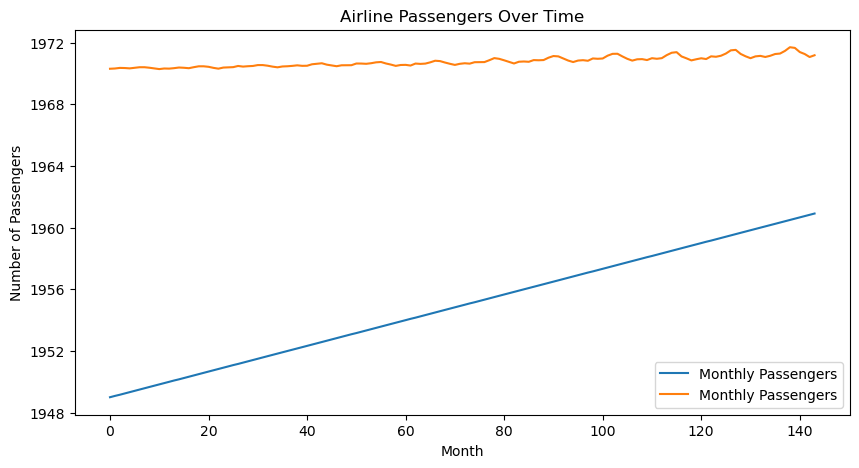

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(data, label='Monthly Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Airline Passengers Over Time')
plt.legend()
plt.show()

In [21]:
data = data.rename(columns={'Month': 'ds', 'Passengers': 'y'})

In [22]:
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [23]:
data.shape

(144, 2)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [25]:
data.describe()

,ds,y
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


In [26]:
data.isnull().sum()

ds    0
y     0
dtype: int64

In [27]:
model = Prophet()

In [28]:
model.fit(data)

21:30:37 - cmdstanpy - INFO - Chain [1] start processing
21:30:42 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
#future dataset
future = model.make_future_dataframe(periods=12, freq='ME')
future.tail()

,ds
151,1961-07-31
152,1961-08-31
153,1961-09-30
154,1961-10-31
155,1961-11-30


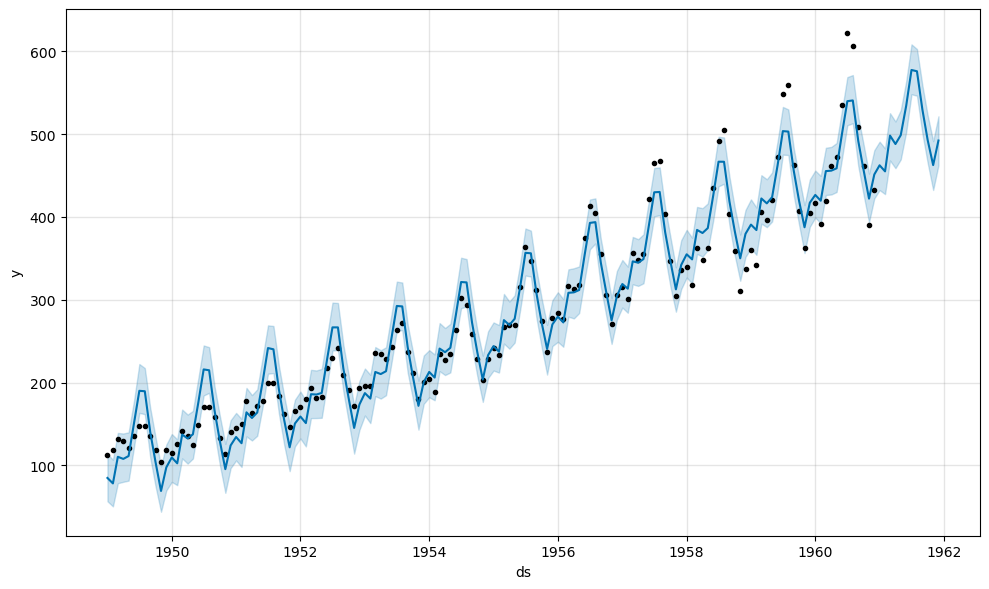

In [39]:
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()